In [98]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [99]:
df=pd.read_csv('log_temp.csv',header=None)
df.head()

,0,1,2,3
0,3/14/19,19:33:07,T=22.0,H=20.0
1,3/14/19,19:38:10,T=22.0,H=20.0
2,3/14/19,19:43:11,T=22.0,H=26.0
3,3/14/19,19:48:14,T=22.0,H=26.0
4,3/14/19,19:53:15,T=22.0,H=20.0


In [100]:
df=df.rename(columns={0:'Date',1:'Time_Stamp',2:'Temperature',3:'Humidity'})

In [101]:
df.head()

,Date,Time_Stamp,Temperature,Humidity
0,3/14/19,19:33:07,T=22.0,H=20.0
1,3/14/19,19:38:10,T=22.0,H=20.0
2,3/14/19,19:43:11,T=22.0,H=26.0
3,3/14/19,19:48:14,T=22.0,H=26.0
4,3/14/19,19:53:15,T=22.0,H=20.0


In [102]:
#df.info()
df=df.loc[df['Temperature']!='error']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 335
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         320 non-null    object
 1   Time_Stamp   320 non-null    object
 2   Temperature  320 non-null    object
 3   Humidity     320 non-null    object
dtypes: object(4)
memory usage: 12.5+ KB


In [103]:
df['Temperature'] = df['Temperature'].astype(str).str.replace('T=', '')
df['Humidity'] = df['Humidity'].astype(str).str.replace('H=', '')
df['Temperature']=pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity']=pd.to_numeric(df['Humidity'], errors='coerce')
#df['Temperature']=pd.to_numeric(df['Temperature'], errors='coerce').fillna(0.0)
#df['Humidity']=pd.to_numeric(df['Humidity'], errors='coerce').fillna(0.0)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 335
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         320 non-null    object 
 1   Time_Stamp   320 non-null    object 
 2   Temperature  320 non-null    float64
 3   Humidity     320 non-null    float64
dtypes: float64(2), object(2)
memory usage: 12.5+ KB


In [105]:
df.shape

(320, 4)

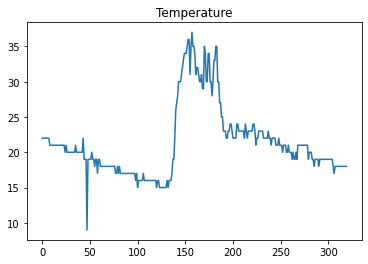

--------------


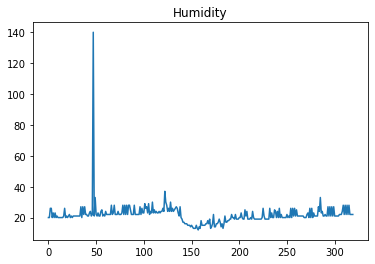

--------------


In [106]:
ct=0
full_columns=['Temperature','Humidity']
for i in range(2,df.shape[1]):
  plt.plot(df.values[:, i:i+1])
  plt.title(df.columns[i])
  plt.show()
  print('--------------')
  ct+=1

##LSTM_APPROACH

In [235]:
import math
val=math.floor(80/100*len(df))-1
train_data=df.iloc[:val, 2:].values

In [236]:
train_data.shape

(255, 2)

In [237]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_s = scaler.fit_transform(train_data)

In [238]:
train_s.shape

(255, 2)

In [259]:
X_train = []
y_train = []
for i in range(3, val):
    X_train.append(train_s[i-3:i, 0:])
    y_train.append(train_s[i, 0:])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))

In [260]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [261]:
X_train.shape

(252, 3, 2)

In [262]:
test_data=df.iloc[val:, 2:].values
print(test_data.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_s = scaler.fit_transform(test_data)
X_test = []
y_test = []
for i in range(3, len(df)-val):
    X_test.append(test_s[i-3:i, 0:])
    y_test.append(test_s[i, 0:])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)

(65, 2)
(62, 3, 2)


In [263]:
seq = Sequential()
seq.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
seq.add(LSTM(units = 50, return_sequences = True))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50, return_sequences = True))
seq.add(Dropout(0.2))

seq.add(LSTM(units = 50))

seq.add(Dense(units = 2))

seq.compile(optimizer = 'adam', loss = 'mean_squared_error',  metrics=['accuracy'])

hist=seq.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data=(X_test, y_test))
seq.save('lstm.hdf5')

Epoch 1/10
8/8 [==============================] - 8s 224ms/step - loss: 0.1163 - accuracy: 0.9722 - val_loss: 0.1912 - val_accuracy: 0.8065
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0756 - accuracy: 0.9960 - val_loss: 0.1174 - val_accuracy: 0.8065
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0264 - accuracy: 0.9960 - val_loss: 0.0520 - val_accuracy: 0.8065
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0207 - accuracy: 0.9960 - val_loss: 0.0589 - val_accuracy: 0.8065
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0695 - val_accuracy: 0.8065
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0149 - accuracy: 0.9960 - val_loss: 0.0556 - val_accuracy: 0.8065
Epoch 7/10
8/8 [==============================] - 0s 17ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.0496 - val_accuracy: 0.8065
Epoch 8/10
8/8 [==========

In [249]:
test_data=df.iloc[val:, 2:].values
print(test_data.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_s = scaler.fit_transform(test_data)
X_test = []
y_test = []
for i in range(1, len(df)-val):
    X_test.append(test_s[i-1:i, 0:])
    y_test.append(test_s[i, 0:])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)

'''X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
predicted_stock_price = seq.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)'''

(65, 2)
(64, 1, 2)


'X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))\npredicted_stock_price = seq.predict(X_test)\npredicted_stock_price = scaler.inverse_transform(predicted_stock_price)'

In [250]:
'''X_test = []
y_test = []
for i in range(val,):
    X_test.append(train_s[i-20:i, 0:])
    y_test.append(train_s[i, 0:])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
predicted_stock_price = seq.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price)'''

'X_test = []\ny_test = []\nfor i in range(val,):\n    X_test.append(train_s[i-20:i, 0:])\n    y_test.append(train_s[i, 0:])\nX_train, y_train = np.array(X_train), np.array(y_train)\n\nX_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))\npredicted_stock_price = seq.predict(X_train)\npredicted_stock_price = scaler.inverse_transform(predicted_stock_price)\nprint(predicted_stock_price)'

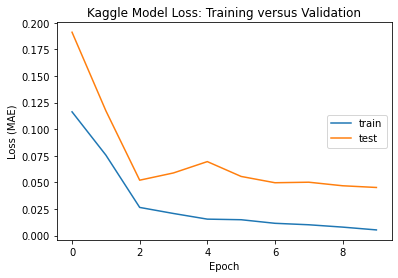

In [264]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Kaggle Model Loss: Training versus Validation')
plt.ylabel('Loss (MAE)')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

##LINEAR_REGRESSION_APPROACH

In [394]:
import numpy as np
from sklearn.model_selection import train_test_split
X=df[['Humidity']]
y=df['Temperature']
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.1, random_state=42)
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [395]:
y_pred=regr.predict(X_test)

In [396]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
print(X_train.shape)
print(X_test.shape)
y_train=y_train.values.reshape((y_train.shape[0],1))
y_test=y_test.values.reshape((y_test.shape[0],1))
print(y_train.shape)
print(y_test.shape)

(288, 1)
(32, 1)
(288, 1)
(32, 1)


In [397]:
# The mean squared error
print('OUTPUT USING LINEAR REGRESSION BY SKLEARN:')
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

OUTPUT USING LINEAR REGRESSION BY SKLEARN:
Mean squared error: 14.42
Coefficient of determination: 0.33


In [401]:
r2_score = regr.score(X_test,y_test)
print(r2_score*100,'%')

33.10164443279635 %


##ANN_approach

In [370]:
X=df[['Humidity']].values
y=df[['Temperature']].values

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(256, 1)
(64, 1)
(256, 1)
(64, 1)


In [374]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [375]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [376]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [377]:
hist=model.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 278.2862 - accuracy: 0.0000e+00
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 139.8909 - accuracy: 0.0000e+00
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 116.4315 - accuracy: 0.0000e+00
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 114.6223 - accuracy: 0.0000e+00
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 114.1818 - accuracy: 0.0000e+00
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 117.4995 - accuracy: 0.0000e+00
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 112.7708 - accuracy: 0.0000e+00
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 119.3562 - accuracy: 0.0000e+00
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 113.1310 - accuracy: 0.0000e+00
Epoch 10/10
26/26 [==============================] - 0s 4ms/step

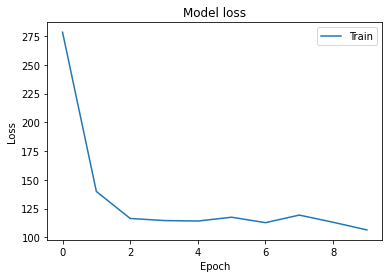

In [378]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [382]:
_, accuracy = model.evaluate(X_test,Y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 11ms/step - loss: 70.5945 - accuracy: 0.0000e+00
Accuracy: 0.00


In [383]:
_, accuracy = model.evaluate(X_train,Y_train)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 2ms/step - loss: 104.4220 - accuracy: 0.0000e+00
Accuracy: 0.00


In [393]:
pip install tensorflow==2.6.0

     |████████████████████████████████| 458.3 MB 9.4 kB/s 
     |████████████████████████████████| 463 kB 54.8 MB/s 
     |████████████████████████████████| 5.8 MB 46.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.13.2
    Uninstalling tensorflow-1.13.2:
      Successfully uninstalled tensorflow-1.13.2
